In [6]:
import os
import json
import torch
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from PIL import ExifTags, Image, ImageOps
from PIL.ExifTags import TAGS

In [7]:
# Get orientation exif tag
for orientation in ExifTags.TAGS.keys():
    if ExifTags.TAGS[orientation] == 'Orientation':
        break


def get_hash(files):
    # Returns a single hash value of a list of files
    return sum(os.path.getsize(f) for f in files if os.path.isfile(f))


def exif_size(img):
    # Returns exif-corrected PIL size
    s = img.size  # (width, height)
    try:
        rotation = dict(img._getexif().items())[orientation]
        if rotation == 6:  # rotation 270
            s = (s[1], s[0])
        elif rotation == 8:  # rotation 90
            s = (s[1], s[0])
    except:
        pass

    return s

In [8]:
def visual2(img, boxes=None, isTrain=True):
  fig = plt.figure()
  ax = fig.add_subplot(111)
  if boxes is not None:
    if len(boxes.shape) == 1:
      boxes = boxes[None, :]
    for box in boxes:
      _w, _h = exif_size(img)
      x_min, y_min, w, h = box[0] * _w, box[1] * _h, box[2] * _w, box[3] * _h
      rect = matplotlib.patches.Rectangle((x_min, y_min), w, h, color='r', fc='none')
      ax.add_patch(rect)
  plt.imshow(img)

def visual(img, boxes=None, isTrain=True):
  fig = plt.figure()
  ax = fig.add_subplot(111)
  if boxes is not None:
    if len(boxes.shape) == 1:
      boxes = boxes[None, :]
    for box in boxes:
      x_min, y_min, w, h = box[0], box[1], box[2], box[3]
      rect = matplotlib.patches.Rectangle((x_min, y_min), w, h, color='r', fc='none')
      ax.add_patch(rect)
  plt.imshow(img)

In [11]:
def get_bboxes(json_file):
    with open(json_file) as f:
        tmp = json.load(f)
        boxes = []
        for i in tmp:
            _w = i['w']
            _h = i['h']
            _x = i['x']
            _y = i['y']
            boxes.append([_x, _y, _w, _h])
        boxes = torch.tensor(boxes)
        return boxes

In [12]:
dataset_path = '/home/pill/competition/dataset'
train_images = '/home/pill/competition/dataset/public_train/pill/images'
train_labels = '/home/pill/competition/dataset/public_train/pill/labels'

In [13]:
def list_all_files(dir, ext = '.jpg'):
    files = []
    for r, d, f in os.walk(dir):
        for file in f:
            if file.endswith(ext):
                files.append(os.path.join(r, file))
    return files

In [14]:
def get_exif_metadata(imgpath):
    image = Image.open(imgpath)
    exifdata = image.getexif()
    for tag_id in exifdata:
        # get the tag name, instead of human unreadable tag id
        tag = TAGS.get(tag_id, tag_id)
        data = exifdata.get(tag_id)
        # decode bytes 
        if isinstance(data, bytes):
            data = data.decode()
        print(f"{tag:25}: {data}")

In [15]:
images_dir = list_all_files(train_images)
print("len(images_dir) = ", len(images_dir))
labels_dir = list_all_files(train_labels, ext='.json')
print("len(labels_dir) = ", len(labels_dir))

len(images_dir) =  9502
len(labels_dir) =  9502


In [70]:
for idx, image_dir in enumerate(images_dir):
    with open(image_dir, "rb") as f:
        f.seek(-2, 2)
        if f.read() != b"\xff\xd9":
            # print(image_dir, ' ', idx)
            img = Image.open(image_dir)
            exifdata = img.getexif()
            for tag_id in exifdata:
                # get the tag name, instead of human unreadable tag id
                tag = TAGS.get(tag_id, tag_id)
                data = exifdata.get(tag_id)
                if (tag == 'Orientation'):
                    print(image_dir, ' ', idx, ' ', data)
        else:
            print(image_dir)
            img = Image.open(image_dir)
            exifdata = img.getexif()
            for tag_id in exifdata:
                # get the tag name, instead of human unreadable tag id
                tag = TAGS.get(tag_id, tag_id)
                data = exifdata.get(tag_id)
                if (tag == 'Orientation'):
                    if data != 1:
                        print(image_dir, ' ', data)
# with open("/home/pill/competition/dataset/public_train/pill/images/VAIPE_P_487_5.jpg", "rb") as f:
#     if f.read() != b"\xff\xd9":
#         exifdata = image.getexif()
#         for tag_id in exifdata:
#             # get the tag name, instead of human unreadable tag id
#             tag = TAGS.get(tag_id, tag_id)
#             data = exifdata.get(tag_id)
#             # decode bytes 
#             if isinstance(data, bytes):
#                 data = data.decode()
#             print(f"{tag:25}: {data}")


/home/pill/competition/dataset/public_train/pill/images/VAIPE_P_487_5.jpg   0   6
/home/pill/competition/dataset/public_train/pill/images/VAIPE_P_471_8.jpg   1   6
/home/pill/competition/dataset/public_train/pill/images/VAIPE_P_545_10.jpg   2   6
/home/pill/competition/dataset/public_train/pill/images/VAIPE_P_13_1.jpg
/home/pill/competition/dataset/public_train/pill/images/VAIPE_P_501_0.jpg
/home/pill/competition/dataset/public_train/pill/images/VAIPE_P_310_0.jpg
/home/pill/competition/dataset/public_train/pill/images/VAIPE_P_350_14.jpg   6   6
/home/pill/competition/dataset/public_train/pill/images/VAIPE_P_567_10.jpg   7   6
/home/pill/competition/dataset/public_train/pill/images/VAIPE_P_328_1.jpg
/home/pill/competition/dataset/public_train/pill/images/VAIPE_P_33_10.jpg
/home/pill/competition/dataset/public_train/pill/images/VAIPE_P_33_10.jpg   6
/home/pill/competition/dataset/public_train/pill/images/VAIPE_P_551_2.jpg
/home/pill/competition/dataset/public_train/pill/images/VAIPE_P_10

In [56]:
for idx, image_dir in enumerate(images_dir):
    with open(image_dir, 'rb') as f:
        img = Image.open(image_dir)
        exifdata = img.getexif()
        for tag_id in exifdata:
            # get the tag name, instead of human unreadable tag id
            tag = TAGS.get(tag_id, tag_id)
            data = exifdata.get(tag_id)
            if (tag == 'Orientation'):
                print(image_dir, ' ', data)
            

/home/pill/competition/dataset/public_train/pill/images/VAIPE_P_487_5.jpg   6
/home/pill/competition/dataset/public_train/pill/images/VAIPE_P_471_8.jpg   6
/home/pill/competition/dataset/public_train/pill/images/VAIPE_P_545_10.jpg   6
/home/pill/competition/dataset/public_train/pill/images/VAIPE_P_13_1.jpg   1
/home/pill/competition/dataset/public_train/pill/images/VAIPE_P_310_0.jpg   1
/home/pill/competition/dataset/public_train/pill/images/VAIPE_P_350_14.jpg   6
/home/pill/competition/dataset/public_train/pill/images/VAIPE_P_567_10.jpg   6
/home/pill/competition/dataset/public_train/pill/images/VAIPE_P_33_10.jpg   6
/home/pill/competition/dataset/public_train/pill/images/VAIPE_P_1058_4.jpg   1
/home/pill/competition/dataset/public_train/pill/images/VAIPE_P_759_1.jpg   6
/home/pill/competition/dataset/public_train/pill/images/VAIPE_P_744_6.jpg   3
/home/pill/competition/dataset/public_train/pill/images/VAIPE_P_755_2.jpg   6
/home/pill/competition/dataset/public_train/pill/images/VAIPE

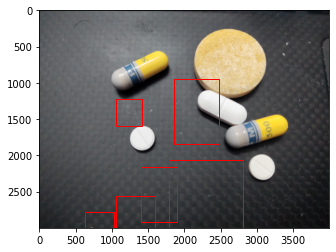

In [51]:
idx = 2
pathimg = images_dir[idx]
pathimg = '/home/pill/competition/dataset/public_train/pill/images/VAIPE_P_99_15.jpg'
img = Image.open(pathimg)
bboxes = get_bboxes(pathimg.replace('image', 'label').replace('.jpg', '.json'))
visual(img, bboxes)

In [25]:
658_7

torch.Size([4, 4])

### Orientation: 1

GPSInfo                  : 2086
ResolutionUnit           : 2
ExifOffset               : 216
Make                     : Apple
Model                    : iPhone X
Software                 : 15.3.1
Orientation              : 1
DateTime                 : 2022:03:15 17:31:32
XResolution              : 72.0
YResolution              : 72.0
HostComputer             : iPhone X


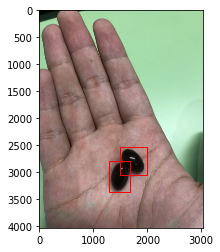

In [16]:
def orientation1(exif_fix=False, img='VAIPE_P_931_1.jpg'):
    pathimg = '/home/pill/competition/dataset/public_train/pill/images/' + img
    get_exif_metadata(pathimg)
    img = Image.open(pathimg)
    if exif_fix:
        img = ImageOps.exif_transpose(img)
    bboxes = get_bboxes(pathimg.replace('image', 'label').replace('.jpg', '.json'))
    visual(img, bboxes)

orientation1()

GPSInfo                  : 2086
ResolutionUnit           : 2
ExifOffset               : 216
Make                     : Apple
Model                    : iPhone X
Software                 : 15.3.1
Orientation              : 1
DateTime                 : 2022:03:15 17:31:32
XResolution              : 72.0
YResolution              : 72.0
HostComputer             : iPhone X


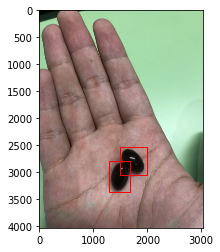

In [74]:
orientation1(exif_fix=True, img='VAIPE_P_931_1.jpg')

GPSInfo                  : 1920
ResolutionUnit           : 2
ExifOffset               : 226
Make                     : Apple
Model                    : iPhone 6s
Software                 : 14.6
Orientation              : 1
DateTime                 : 2021:07:22 02:01:24
YCbCrPositioning         : 1
XResolution              : 72.0
YResolution              : 72.0
HostComputer             : iPhone 6s


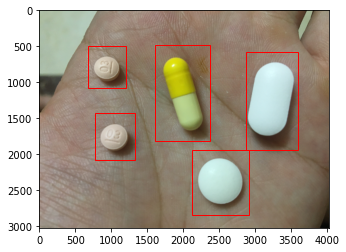

In [17]:
orientation1(exif_fix=True, img='VAIPE_P_9_4.jpg')

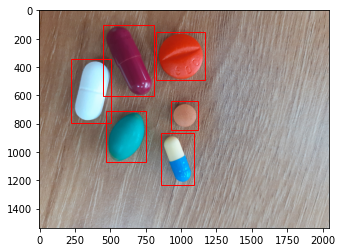

In [18]:
orientation1(exif_fix=True, img='VAIPE_P_229_5.jpg')

### Orientation: 6

ImageWidth               : 3000
ImageLength              : 4000
ResolutionUnit           : 2
ExifOffset               : 196
Make                     : vsmart
Model                    : Live 4
Orientation              : 6
YCbCrPositioning         : 1
DateTime                 : 2022:03:10 22:56:10
XResolution              : 72.0
YResolution              : 72.0


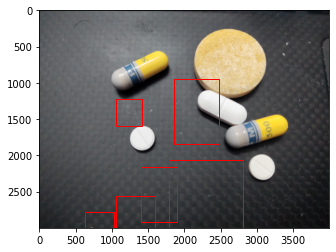

In [67]:
def orientation6(exif_fix=False, img='VAIPE_P_99_15.jpg'):
    pathimg = '/home/pill/competition/dataset/public_train/pill/images/' + img
    get_exif_metadata(pathimg)
    img = Image.open(pathimg)
    if exif_fix:
        img = ImageOps.exif_transpose(img)
    bboxes = get_bboxes(pathimg.replace('image', 'label').replace('.jpg', '.json'))
    visual(img, bboxes)

orientation6()

ImageWidth               : 3000
ImageLength              : 4000
ResolutionUnit           : 2
ExifOffset               : 196
Make                     : vsmart
Model                    : Live 4
Orientation              : 6
YCbCrPositioning         : 1
DateTime                 : 2022:03:10 22:56:10
XResolution              : 72.0
YResolution              : 72.0


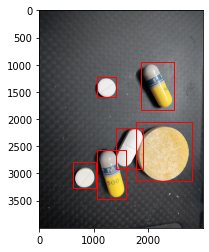

In [66]:
orientation6(exif_fix=True)

ResolutionUnit           : 2
ExifOffset               : 198
Make                     : Apple
Model                    : iPhone 12 Pro
Software                 : 15.4
DateTime                 : 2022:03:07 15:58:06
XResolution              : 72.0
YResolution              : 72.0
HostComputer             : iPhone 12 Pro


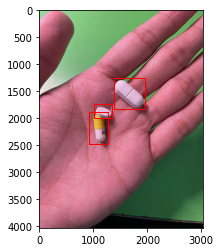

In [68]:
orientation6(exif_fix=True, img='VAIPE_P_328_1.jpg')

GPSInfo                  : 2144
ResolutionUnit           : 2
ExifOffset               : 236
Make                     : Apple
Model                    : iPhone XS Max
Software                 : 15.3.1
Orientation              : 6
DateTime                 : 2022:03:10 23:12:12
YCbCrPositioning         : 1
XResolution              : 72.0
YResolution              : 72.0
HostComputer             : iPhone XS Max


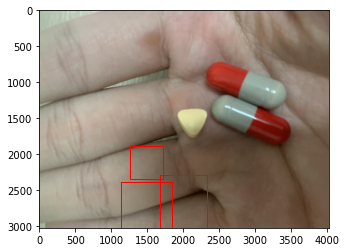

In [75]:
orientation6(exif_fix=True, img='VAIPE_P_146_20.jpg')

### Orientation: None

ResolutionUnit           : 2
ExifOffset               : 198
Make                     : Apple
Model                    : iPhone 12 Pro
Software                 : 15.4
DateTime                 : 2022:03:09 17:26:12
XResolution              : 72.0
YResolution              : 72.0
HostComputer             : iPhone 12 Pro


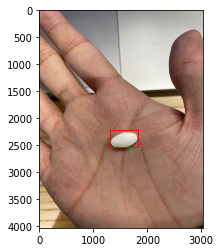

In [64]:
def orientationNone(exif_fix=False):
    pathimg = '/home/pill/competition/dataset/public_train/pill/images/VAIPE_P_830_0.jpg'
    get_exif_metadata(pathimg)
    img = Image.open(pathimg)
    if exif_fix:
        img = ImageOps.exif_transpose(img)
    bboxes = get_bboxes(pathimg.replace('image', 'label').replace('.jpg', '.json'))
    visual(img, bboxes)

orientationNone()

### Orientation: 3

ResolutionUnit           : 2
ExifOffset               : 201
Make                     : samsung
Model                    : SM-A205F
Software                 : A205FXXUACUI2
Orientation              : 3
YCbCrPositioning         : 1
DateTime                 : 2022:03:12 17:22:50
XResolution              : 72.0
YResolution              : 72.0


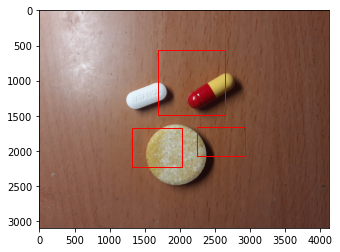

In [62]:
def orientation3(exif_fix=False):
    pathimg = '/home/pill/competition/dataset/public_train/pill/images/VAIPE_P_984_5.jpg'
    get_exif_metadata(pathimg)
    img = Image.open(pathimg)
    if exif_fix:
        img = ImageOps.exif_transpose(img)
    bboxes = get_bboxes(pathimg.replace('image', 'label').replace('.jpg', '.json'))
    visual(img, bboxes)

orientation3()

ResolutionUnit           : 2
ExifOffset               : 201
Make                     : samsung
Model                    : SM-A205F
Software                 : A205FXXUACUI2
Orientation              : 3
YCbCrPositioning         : 1
DateTime                 : 2022:03:12 17:22:50
XResolution              : 72.0
YResolution              : 72.0


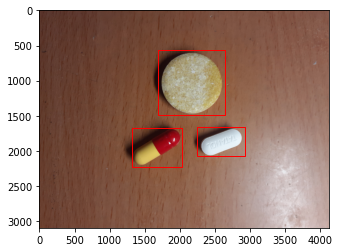

In [63]:
orientation3(exif_fix=True)

In [76]:
!pwd

/home/pill/competition/yolov7/tools
